## 1 Mandelbrot Set

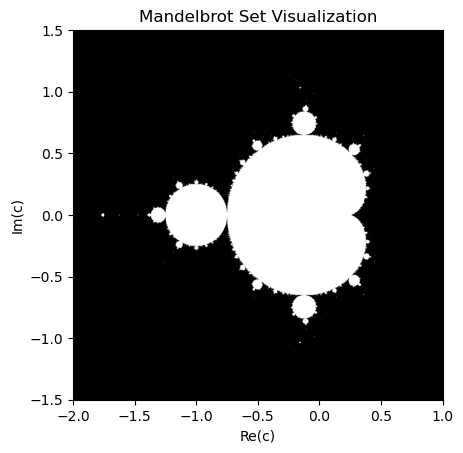

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
threshold = 50    # |z| < threshold
num_pts = 1000     # the number of grid points for each axis.
maximum_iteration = 250       # a maximum number of iterations.

# Generate points over the range [−2, 1] × [−1.5, 1.5].
x_range, y_range = np.mgrid[-2:1:num_pts*1j, -1.5:1.5:num_pts*1j]

# Set c = x + 1j * x
c_range = x_range + 1j *y_range

# mask will indicate which points are in Mandelbrot set
mask = np.zeros((num_pts, num_pts))

# Check whether each point is in Mandelbrot set or not.
for i in range(num_pts):
    for j in range(num_pts):
        c = c_range[i,j]
        z = 0
        iterations = 0

        while abs(z) < threshold and iterations < maximum_iteration:
            z = z*z + c
            iterations += 1
        # If z does not diverges, it is in the Mandelbrot set
        if iterations == maximum_iteration:
            mask[i, j] = 1

# Plotting
plt.imshow(mask.T, extent=(-2, 1, -1.5, 1.5)) #plt.imshow() plots the first index on the y-axis, and the second index on the x-axis
plt.gray()
plt.title('Mandelbrot Set Visualization')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.savefig('mandelbrot.png')
plt.show()

# 2 Markov Chain

In [2]:
import numpy as np

### Task 1 ###
# Construct 5x5 random matrix
P = np.random.rand(5,5)

# Normalize each row so it sums to 1
for i in range(5):
    P[i] = P[i]/sum(P[i])   
print(f"P: {P}\n")



### Task 2 ###
# Generate randome 5x1 vector
p = np.random.rand(5,)    

# Normalize p so it sums to 1
p = p/sum(p)    # Normalize

# Apply the transition rul 50 times, it results p_50
for _ in range(50):
    p = np.dot(P.T, p)
p_50 = p

print(f"p: {p}\n")
print(f"p_50: {p_50}\n")



### Task 3 ###
# Calculate the eigenvalues and eigenvectors of P.T
eigenvalues, eigenvectors = np.linalg.eig(P.T)

# Locate the eigenvalue closest to 1
index_of_1 = np.argmin(np.abs(eigenvalues - 1))

# Get the corresponding eigenvector
eigenvector_of_1 = eigenvectors[:,index_of_1]

# Scale the eigenvector so it sums to 1
stationary_distribution = eigenvector_of_1 /sum(eigenvector_of_1) 

print(f"stationary distribution: {stationary_distribution}\n")



### Task 4 ###
# Calculate the difference between p_50 and stationary distribution
difference = np.abs(p_50 - stationary_distribution)
matches = np.all(difference < 1e-5)
print(f"Do they match within 1e-5? {matches}")

P: [[0.29040583 0.27848163 0.25980566 0.07036188 0.10094501]
 [0.18797697 0.29626513 0.31258072 0.19917708 0.00400011]
 [0.21400078 0.09706983 0.47888384 0.16089536 0.04915019]
 [0.22413387 0.15750824 0.25039307 0.06163733 0.30632748]
 [0.40127599 0.30129281 0.09939313 0.01481165 0.18322641]]

p: [0.24662325 0.21075452 0.325691   0.12059245 0.09633879]

p_50: [0.24662325 0.21075452 0.325691   0.12059245 0.09633879]

stationary distribution: [0.24662325-0.j 0.21075452-0.j 0.325691  -0.j 0.12059245-0.j
 0.09633879-0.j]

Do they match within 1e-5? True


# 3 Taylor Series Approximation

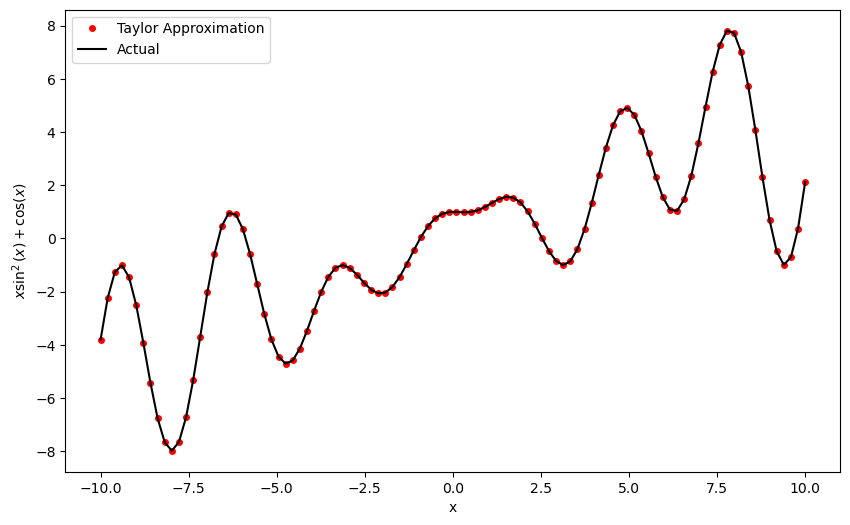

,degree,elapsed_time,total_error
0,50,0.075713,4.949573e+01
1,60,0.066635,1.754188e-03
2,70,0.075427,1.577951e-07
3,80,0.084549,1.354434e-07
4,90,0.149097,1.354434e-07
5,100,0.170312,1.354434e-07


In [5]:
import pandas as pd
import numpy as np
from sympy import symbols, diff, exp, sin, cos, factorial, lambdify
import matplotlib.pyplot as plt
import time

### Task 1 ###
def taylor_approx(func, start, end, degree, fixed_c):
    # Symbolic Taylor series to be made
    symbolic_poly = 0

    # Build Taylor series
    for i in range(degree+1):
        # Get i-th derivative
        diff_term = diff(func, x, i)
    
        # Get the value of derivative at c
        diff_val_at_c = diff_term.subs(x, fixed_c)
    
        # Add the term to the Taylor series
        term = diff_val_at_c * ((x - fixed_c)**i) / factorial(i)
        symbolic_poly += term
    # Convert symbolic polynomial to numpy polynomial
    numerical_poly = lambdify(x, symbolic_poly, 'numpy')

    # Generate x values and get approximation of y
    x_values = np.linspace(start, end, 100)
    y_approx = numerical_poly(x_values)
    
    return y_approx

### Task 2 ###
x = symbols('x')

# Given Inputs
func = x * sin(x) ** 2 + cos(x)
start = -10
end = 10
degree = 99
fixed_c = 0

# Approximate
y_approx = taylor_approx(func, start, end, degree, fixed_c)

# Plotting
x_values = np.linspace(start, end, 100)
y_actual = (lambda x: x * np.sin(x)**2 + np.cos(x))(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_approx, 'ro', label='Taylor Approximation', markersize=4)
plt.plot(x_values, y_actual, 'k-', label='Actual')
plt.xlabel('x')
plt.ylabel('$x \sin^2(x) + \cos(x)$')
plt.legend()
plt.show()

### Task 3 ###
def analyze_taylor(initial_degree, final_degree, degree_step): 
    # We will make DataFrame with data
    data = []

    # For each degree m, we calculate the approximation time and total error
    for degree in range(initial_degree, final_degree + degree_step, degree_step):
        # Apprloximate y and time how long it takes
        start_time = time.time()
        y_approx = taylor_approx(func, start, end, degree, fixed_c)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Calculate total error
        total_error = sum(abs(y_actual-y_approx))
        data.append([degree, elapsed_time, total_error])

    # Make DataFrame
    df = pd.DataFrame(data, columns=['degree', 'elapsed_time', 'total_error'])
    
    # Save the DataFrame to a CSV file as required
    df.to_csv('taylor_values.csv', index=False)

    return df
    
# Running the function
initial_degree = 50
final_degree = 100
degree_step = 10

analyze_taylor(initial_degree, final_degree, degree_step)
